# K-Medoids

## Introdução

Nesta seção vamos abordar o modelo de agrupamento chamado **K-Medoids**. Neste modelo, o "centro" de cada grupo é um ponto dos dados fornecidos. 

Como estamos ultimamente falando sobre agrupamento, os dados que vamos usar são os do Iris.

## Dados Iniciais

In [2]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from numpy import asarray

iris = datasets.load_iris()

Obs: A função ```asarray``` do numpy transforma um objeto em array. Usaremos isso no fim do notebook para gerar a matriz de confusão.

## ```kmedoids```

Para chamarmos a classe ```kmedoids```, digitamos

In [6]:
from pyclustering.cluster.kmedoids import kmedoids

Assim, para criarmos uma instância dessa classe, devemos fornecer os seguintes parâmetros:

* ```data```: dados iniciais a serem agrupados,
* ```initial_index_medoids```: lista contendo os índices (número das linhas) dos medoides iniciais. Como queremos criar 3 grupos, então a lista deve possuir 3 elementos. Além disso, como o próprio algoritmo vai encontrar os "medoides de verdade", então podemos colocar índices quaisquer.

Como é mais simples fazer gráficos 2D, então pegaremos as duas primeiras colunas dos dados Iris.

In [7]:
cluster = kmedoids(data = iris.data[:,0:2],
                   initial_index_medoids = [3,12,20])

Note que, quando digitamos ```0:2```, selecionamos as colunas 0 e 1 (a coluna 2 não é selecionada). Além disso, quando digitamos no parâmetro ```initial_index_medoids``` a lista [3,12,20], queremos dizer que os medoides iniciais são os pontos correspondentes às linhas 3, 12 e 20, respectivamente.  

Para visualizar os medoids, usamos o método ```get_medoids```:

In [8]:
cluster.get_medoids()

[3, 12, 20]

Parece redundante chamar esse método, mas ele será útil mais tarde depois que o modelo realizar o agrupamento dos dados. Assim sendo, para realizar o agrupamento propriamente dito, basta usar o método ```process```.

In [9]:
cluster.process()

Assimm, os novos medoides são

In [11]:
medoides = cluster.get_medoids()

medoides

[112, 82, 7]

Além disso, para vermos como estão agrupados os dados, usamos o método ```get_clusters```, que retorna uma lista contendo os índices que correspondem a um mesmo grupo. No nosso caso, teremos 3 elementos, onde cada elemento é uma lista contendo os números das linhas (índices) de cada grupo. Por exemplo, se o retorno for [[1,3],[8,4],[5,6]], então as linhas 1 e 3 pertencem a um mesmo grupo; as linhas 8 e 4 pertencem a outro grupo e assim por diante.

In [12]:
previsoes = cluster.get_clusters()

previsoes

[[50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106]]

Pelo resultado, podemos inferir que o último grupo é o da Setosa de acordo com o que já vimos nos notebooks anteriores.

## ```cluster_visualizer```

Agora que já temos as previsões, vamos visualizá-las com a classe ```cluster_visualizer```. Para importá-la, digitamos

In [13]:
from pyclustering.cluster import cluster_visualizer

Com isso, usamos os métodos ```append_cluster``` e ```show```

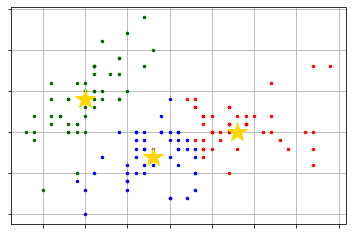

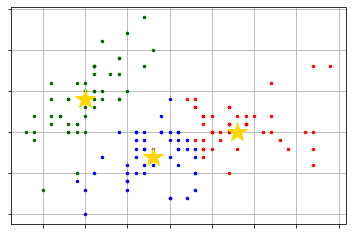

In [14]:
v = cluster_visualizer()

v.append_clusters(previsoes, iris.data[:,0:2])

v.append_cluster(medoides, data = iris.data[:,0:2], marker = '*', markersize = 20)

v.show()

## Precisão do Modelo

Para estimar a precisão do modelo, usamos a matriz de confusão. A diferença é que devemos criar listas com os resultaos e depois transformá-los em arrays.

In [16]:
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
     for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])
        
lista_previsoes = asarray(lista_previsoes)
lista_real = asarray(lista_real)
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]])

### Outros

In [17]:
lista_previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
lista_real

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2])